In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import shift
from copy import deepcopy

In [2]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 60

In [7]:
map_path = "/home/danielmtz/Data/datasets/CarlaBEV/maps/Town01/Town01-1024-RGB.jpg"
# msi
#map_path = "/home/dan/Data/datasets/CarlaBEV/Town01-1024-RGB.jpg"

In [4]:
class Map(object):
    def __init__(self) -> None:
        self._map_arr = np.array(Image.open(map_path))
        self._X, self._Y, _ = self._map_arr.shape
        self._win_size = 1024
        #
        self._ymin = 0
        self._xmin = self._X - self._win_size
        self._outx, self._outy = 0, 0
        self.move_sliding_window([0, 0])

    def move_sliding_window(self, direction):

        aux = self._xmin + direction[0]
        auy = self._ymin + direction[1]

        self._xmin = np.clip(aux, 0, self._X - self._win_size - 1)
        self._ymin = np.clip(auy, 0, self._Y - self._win_size - 1)
        #
        fov = deepcopy(self._map_arr)
        self._fov = fov[
            self._xmin : self._xmin + self._win_size,
            self._ymin : self._ymin + self._win_size,
        ]
        #
        aux = aux - self._X
        auy = auy - self._Y
        print(aux, auy)
        print(self._xmin, self._ymin)
        if aux + self._win_size:
            self._fov = shift(self._fov, shift=(aux, 0, 0), mode="constant", cval=0)
        elif aux >= self._win_size:
            self._fov = shift(
                self._fov, shift=(aux - self._win_size, 0, 0), mode="constant", cval=0
            )

        if auy < 0:
            self._fov = shift(self._fov, shift=(0, auy, 0), mode="constant", cval=0)
        elif auy >= self._win_size:
            self._fov = shift(
                self._fov, shift=(0, auy - self._win_size, 0), mode="constant", cval=0
            )

    def _get_fov(self):
        return self._fov


    def get_map(self):
        return self._get_fov()

    @property
    def map(self) -> np.array:
        return self._map_arr


In [8]:
class Map(object):
    def __init__(self) -> None:
        self._map_arr = np.array(Image.open(map_path))
        self._X, self._Y, _ = self._map_arr.shape
        self._win_size = 1024
        #
        self._ymin = 0
        self._xmin = self._X - self._win_size
        self._outx, self._outy = 0, 0
        self.move_sliding_window([0, 0])

    def move_sliding_window(self, direction):

        aux = self._xmin + direction[0]
        auy = self._ymin + direction[1]

        self._xmin = np.clip(aux, 0, self._X - self._win_size - 1)
        self._ymin = np.clip(auy, 0, self._Y - self._win_size - 1)
        #
        fov = deepcopy(self._map_arr)
        self._fov = fov[
            self._xmin : self._xmin + self._win_size,
            self._ymin : self._ymin + self._win_size,
        ]
        #

    def _get_fov(self):
        return self._fov


    def get_map(self):
        return self._get_fov()

    @property
    def map(self) -> np.array:
        return self._map_arr


In [9]:
map = Map()

In [10]:
map.map.shape

(8192, 6144, 3)

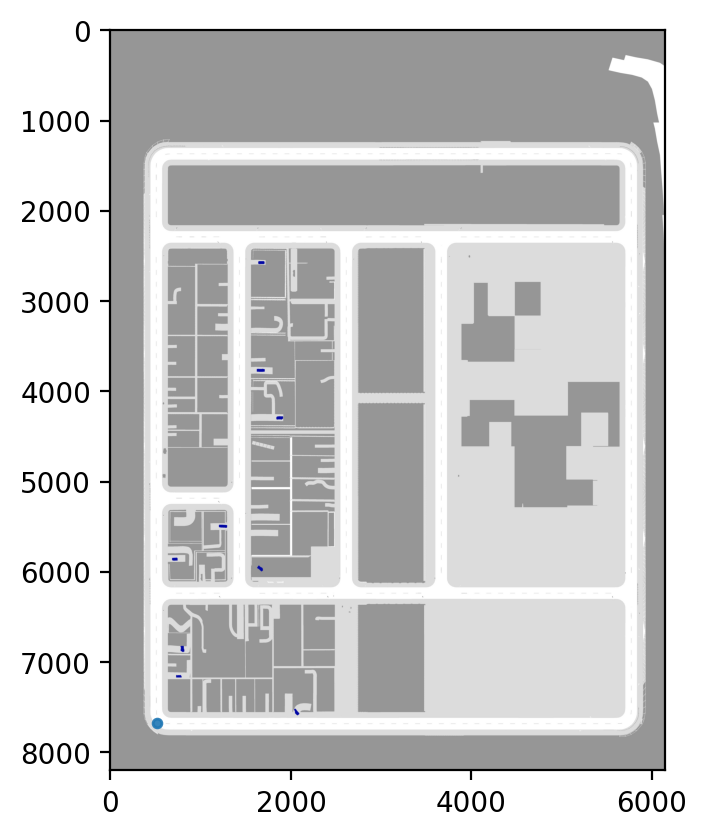

In [13]:
plt.imshow(map.map)
plt.scatter(x=512, y=7679, s=10, alpha=0.9)
plt.show()

In [9]:
movement = np.array([0, 0])
map.move_sliding_window(movement)
fov = map.get_map()
fov.shape

(1024, 1024, 3)

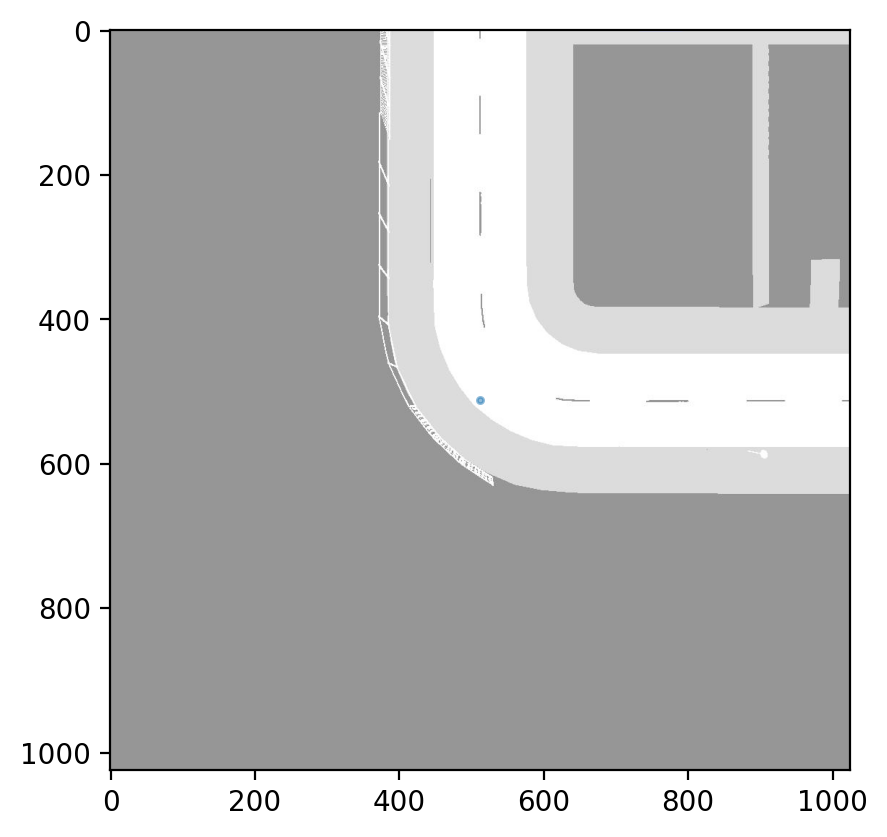

In [10]:
plt.imshow(fov)
plt.scatter(x=512, y=512, s=5, alpha=0.5)
plt.show()

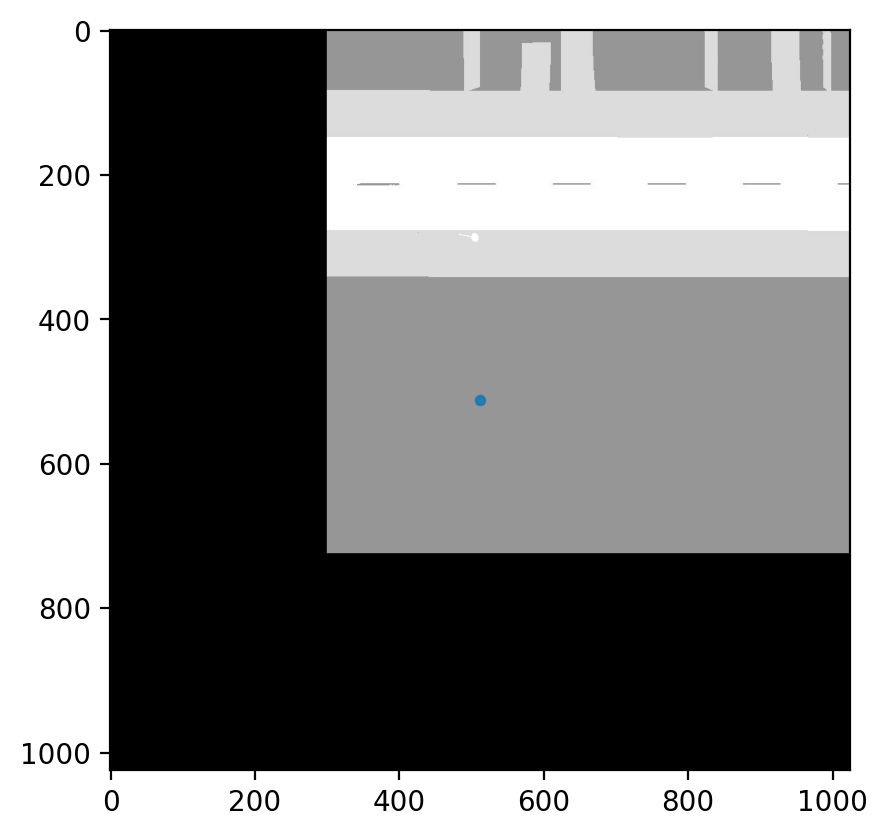

In [37]:
direction = np.array([0, 100])
map.move_sliding_window(direction)
fov = map.get_map()
fov_shifted = shift(deepcopy(fov), shift=(-300, 300, 0), mode="constant", cval=0)

plt.imshow(fov_shifted)
plt.scatter(x=512, y=512, s=10, alpha=0.9)
plt.show()


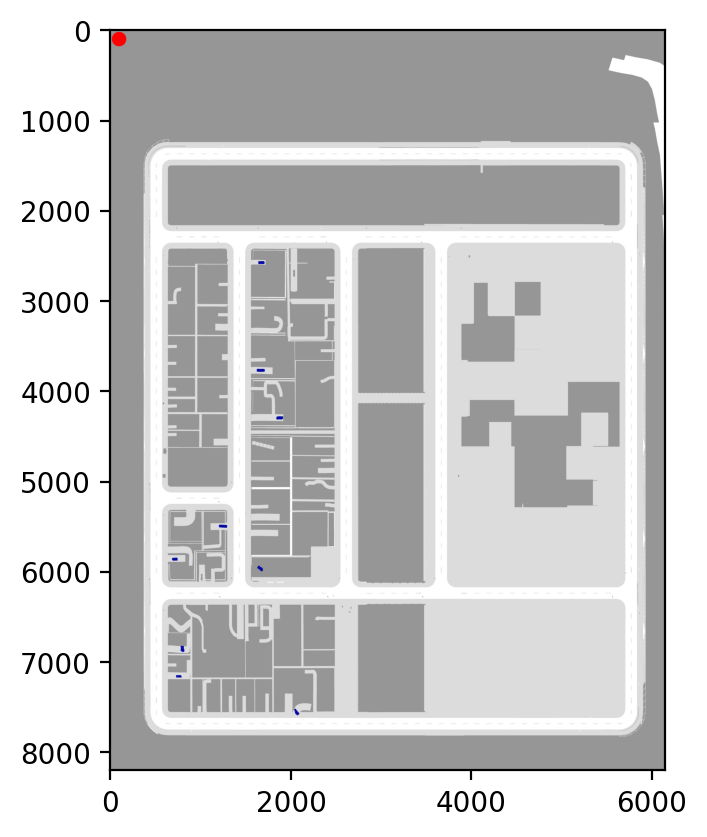

In [14]:
from skimage import draw
rr, cc = draw.disk((100, 100), radius=80, shape=map.get_map().shape)
img = deepcopy(map.map)
img[rr, cc] = (255, 0, 0)
plt.imshow(img)
plt.show()